# Evaluating Logistic Regression Models - Lab

## Introduction

In regression, you are predicting continous values so it makes sense to discuss error as a distance of how far off our estimates were. When classifying a binary variable, however, a model is either correct or incorrect. As a result, we tend to quantify this in terms of how many false positives versus false negatives we come across. In particular, we examine a few different specific measurements when evaluating the performance of a classification algorithm. In this lab, you'll review precision, recall, accuracy, and F1 score in order to evaluate our logistic regression models.


## Objectives 

In this lab you will: 

- Implement evaluation metrics from scratch using Python 



## Terminology review  

Let's take a moment and review some classification evaluation metrics:  


$$ \text{Precision} = \frac{\text{Number of True Positives}}{\text{Number of Predicted Positives}} $$    

$$ \text{Recall} = \frac{\text{Number of True Positives}}{\text{Number of Actual Total Positives}} $$  
  
$$ \text{Accuracy} = \frac{\text{Number of True Positives + True Negatives}}{\text{Total Observations}} $$

$$ \text{F1 score} = 2 * \frac{\text{Precision * Recall}}{\text{Precision + Recall}} $$


At times, it may be best to tune a classification algorithm to optimize against precision or recall rather than overall accuracy. For example, imagine the scenario of predicting whether or not a patient is at risk for cancer and should be brought in for additional testing. In cases such as this, we often may want to cast a slightly wider net, and it is preferable to optimize for recall, the number of cancer positive cases, than it is to optimize precision, the percentage of our predicted cancer-risk patients who are indeed positive.

## Split the data into training and test sets

In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

Split the data first into `X` and `y`, and then into training and test sets. Assign 25% to the test set and set the `random_state` to 0. 

In [11]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split data into X and y
y = df['target']
X = df.drop('target', axis=1)

# normalize X
X = X.dropna()
for col in X.columns:
    X[col] = ((X[col] - X[col].min()) / (X[col].max() - X[col].min()))

# Split the data into a training and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Build a vanilla logistic regression model

- Import and instantiate `LogisticRegression` 
- Make sure you do not use an intercept term and use the `'liblinear'` solver 
- Fit the model to training data

In [12]:
# Import LogisticRegression
from sklearn.linear_model import LogisticRegression

# Instantiate LogisticRegression
logreg = LogisticRegression(fit_intercept=False, C=1e12, solver='liblinear')

# Fit to training data
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Write a function to calculate the precision

In [15]:
def precision(y, y_hat):
    # number of true positives / number of predicted positives
    
    # number of true positives
    tp = 0
    for ele in zip(y, y_hat):
        if (ele[0]==1) & (ele[1]==1):
            tp += 1
    
    # number of predicted positves
    predicted_positives = y_hat.sum()
    
    precision = tp/predicted_positives
    
    return precision

## Write a function to calculate the recall

In [16]:
def recall(y, y_hat):
    # number of true positives / number of actual positives
    
    # number of true positives
    tp = 0
    for ele in zip(y, y_hat):
        if (ele[0]==1) & (ele[1]==1):
            tp += 1
            
    # number of actual positives
    actual_positives = y.sum()
    
    recall = tp / actual_positives
    
    return recall

## Write a function to calculate the accuracy

In [27]:
def accuracy(y, y_hat):
    # number of true postives and true negatives / total observations
    
    # number of true and false positives
    tp_fp = 0
    for ele in zip(y, y_hat):
        if ele[0] == ele[1]:
            tp_fp += 1
    
    # number of observations
    total = len(y)
    
    accuracy_ = tp_fp/total
    
    return accuracy_

## Write a function to calculate the F1 score

In [29]:
def f1_Score(y, y_hat):
    # 2 * precision * recall / precision + recall
    
    # precision
    precision_ = precision(y, y_hat)
    
    # recall
    recall_ = recall(y, y_hat)
    
    return (2 * precision_ * recall_) / (precision_ + recall_)

## Calculate the precision, recall, accuracy, and F1 score of your classifier 

Do this for both the training and test sets. 

In [30]:
# Your code here
y_hat_train = logreg.predict(X_train)
y_hat_test = logreg.predict(X_test)

In [40]:
print('precision on training set: ', precision(y_train, y_hat_train))
print('recall on training set: ', recall(y_train, y_hat_train))
print('accuracy on training set: ', accuracy(y_train, y_hat_train))
print('f1 score on training set: ', f1_Score(y_train, y_hat_train))
print('\n')
print('precision on testing set: ', precision(y_test, y_hat_test))
print('recall on testing set: ', recall(y_test, y_hat_test))
print('accuracy on testing set: ', accuracy(y_test, y_hat_test))
print('f1 score on training set: ', f1_Score(y_test, y_hat_test))

precision on training set:  0.8449612403100775
recall on training set:  0.8934426229508197
accuracy on training set:  0.8546255506607929
f1 score on training set:  0.8685258964143425


precision on testing set:  0.8085106382978723
recall on testing set:  0.8837209302325582
accuracy on testing set:  0.8157894736842105
f1 score on training set:  0.8444444444444444


Great job! Now it's time to check your work with `sklearn`. 

## Calculate metrics with `sklearn`

Each of the metrics we calculated above is also available inside the `sklearn.metrics` module.  

In the cell below, import the following functions:

* `precision_score`
* `recall_score`
* `accuracy_score`
* `f1_score`

Compare the results of your performance metrics functions above with the `sklearn` functions. Calculate these values for both your train and test set. 

In [41]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('precision on training set: ', precision_score(y_train, y_hat_train))
print('recall on training set: ', recall_score(y_train, y_hat_train))
print('accuracy on training set: ', accuracy_score(y_train, y_hat_train))
print('f1 score on training set: ', f1_score(y_train, y_hat_train))
print('\n')
print('precision on testing set: ', precision_score(y_test, y_hat_test))
print('recall on testing set: ', recall_score(y_test, y_hat_test))
print('accuracy on testing set: ', accuracy_score(y_test, y_hat_test))
print('f1 score on training set: ', f1_score(y_test, y_hat_test))

precision on training set:  0.8449612403100775
recall on training set:  0.8934426229508197
accuracy on training set:  0.8546255506607929
f1 score on training set:  0.8685258964143425


precision on testing set:  0.8085106382978723
recall on testing set:  0.8837209302325582
accuracy on testing set:  0.8157894736842105
f1 score on training set:  0.8444444444444444


Nicely done! Did the results from `sklearn` match that of your own? 

## Compare precision, recall, accuracy, and F1 score for train vs test sets

Calculate and then plot the precision, recall, accuracy, and F1 score for the test and training splits using different training set sizes. What do you notice?

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

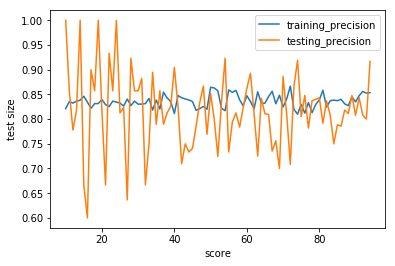

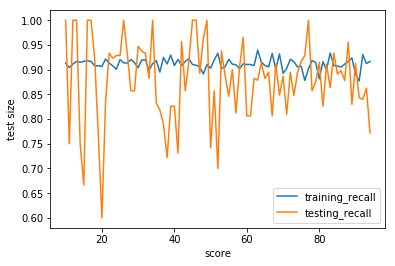

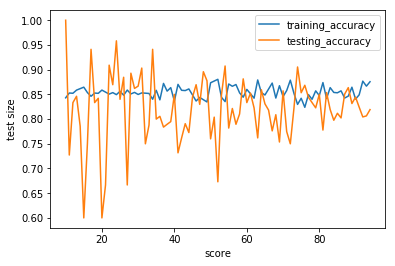

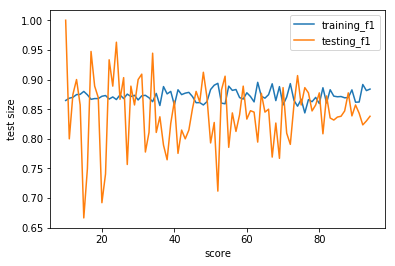

In [53]:
# lists to store scores
training_precision = []
testing_precision = []
training_recall = []
testing_recall = []
training_accuracy = []
testing_accuracy = []
training_f1 = []
testing_f1 = []
I = []

for i in range(10, 95):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= i) # replace the "None" here
    logreg = LogisticRegression(fit_intercept=False, C=1e20, solver='liblinear')
    model_log = logreg.fit(X_train, y_train)
    y_hat_test = logreg.predict(X_test)
    y_hat_train = logreg.predict(X_train)
    
    # Your code here
    
    # precision
    training_precision.append(precision_score(y_train, y_hat_train))
    testing_precision.append(precision_score(y_test, y_hat_test))
    
    # recall
    training_recall.append(recall_score(y_train, y_hat_train))
    testing_recall.append(recall_score(y_test, y_hat_test))
    
    # accuracy
    training_accuracy.append(accuracy_score(y_train, y_hat_train))
    testing_accuracy.append(accuracy_score(y_test, y_hat_test))
    
    # f1 score
    training_f1.append(f1_score(y_train, y_hat_train))
    testing_f1.append(f1_score(y_test, y_hat_test))
    
    # i's
    I.append(i)

# Plotting
metrics = [[training_precision, testing_precision], [training_recall, testing_recall],
        [training_accuracy, testing_accuracy], [training_f1, testing_f1]]

labels = [['training_precision', 'testing_precision'], ['training_recall', 'testing_recall'],
        ['training_accuracy', 'testing_accuracy'], ['training_f1', 'testing_f1']]

for metric, label in zip(metrics, labels):
    plt.plot(I, metric[0], label=label[0])
    plt.plot(I, metric[1], label=label[1])
    plt.xlabel('score')
    plt.ylabel('test size')
    plt.legend()
    plt.show()

Create four scatter plots looking at the train and test precision in the first one, train and test recall in the second one, train and test accuracy in the third one, and train and test F1 score in the fourth one. 

We already created the scatter plot for precision: 

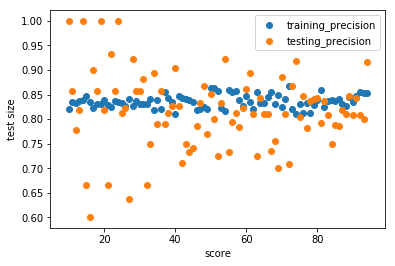

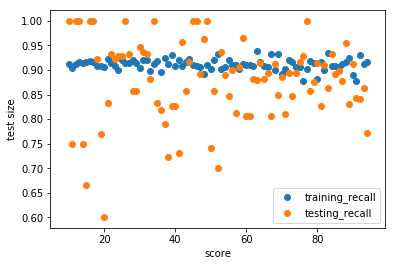

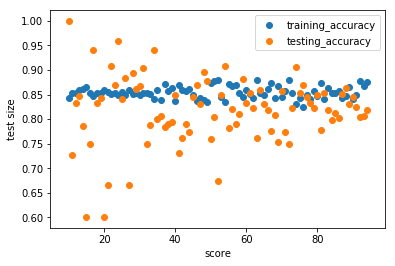

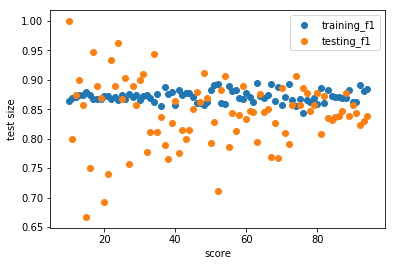

In [54]:
# Plotting
metrics = [[training_precision, testing_precision], [training_recall, testing_recall],
        [training_accuracy, testing_accuracy], [training_f1, testing_f1]]

labels = [['training_precision', 'testing_precision'], ['training_recall', 'testing_recall'],
        ['training_accuracy', 'testing_accuracy'], ['training_f1', 'testing_f1']]

for metric, label in zip(metrics, labels):
    plt.scatter(I, metric[0], label=label[0])
    plt.scatter(I, metric[1], label=label[1])
    plt.xlabel('score')
    plt.ylabel('test size')
    plt.legend()
    plt.show()

## Summary

Nice! In this lab, you calculated evaluation metrics for classification algorithms from scratch in Python. Going forward, continue to think about scenarios in which you might prefer to optimize one of these metrics over another.